# EDA for UNSW-NB15 Data Set

In [1]:
import pandas as pd
import numpy as np


# Modeling Imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import OneClassSVM

from sklearn.metrics import confusion_matrix, roc_auc_score

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./data/UNSW_NB15_testing-set.csv', header=0, index_col=0)
len(data.columns)

44

Note that IP address and port numbers are not included in the data set, and that we've used the id column as an index.
* id
* srcip
* sport
* dstip
* dsport  

This brings us to 44 data columns that we'll have to use as features.

In [3]:
mask = data.label == 1
print("No. of attacks:", data[mask].label.size)
print("No. of normal: ", data[~mask].label.size)

No. of attacks: 119341
No. of normal:  56000


# Modeling Using only Numeric Features
The columns that remain after excluding string objects are all numerical, but contain a mix of ordinal, categorical, integer, and float values.

In [4]:
X = data.select_dtypes(exclude='object').iloc[:,:-1]
y = data.label

In [5]:
# Number of numeric features remaining
len(X.columns)

39

In [88]:
rfc = RandomForestClassifier()
rfc.fit(X,y)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [91]:
print(roc_auc_score(y, rfc.predict(X)))
confusion_matrix(y, rfc.predict(X))

0.9958843069888567


array([[ 55677,    323],
       [   294, 119047]])

In [72]:
ilf = IsolationForest()

In [124]:
ilf.fit(X[~mask])

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:214: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:224: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=None, verbose=0)

In [125]:
# Isolation Forest outputs -1 and 1, change this to 0 and 1
y_pred = ilf.predict(X[mask])
y_pred = (y_pred>0).astype(int)


In [134]:
pd.Series(y_pred).value_counts()

1    62612
0    56729
dtype: int64

In [129]:
#print(roc_auc_score(y[mask], y_pred))
confusion_matrix(y[mask], y_pred)

array([[    0,     0],
       [56729, 62612]])

In [98]:
from sklearn.decomposition import PCA

In [101]:
pca_10 = PCA(n_components=2)
data_2d = pca_10.fit_transform(X)

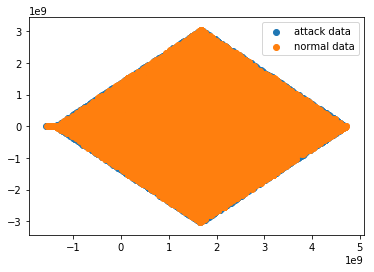

In [130]:
plt.scatter(data_2d[mask,0], data_2d[mask,1], label = 'attack data')
plt.scatter(data_2d[~mask,0], data_2d[~mask,1], label = 'normal data')
plt.legend()

In [105]:
data_2d.shape

(175341, 2)

Basic One Class SVM

In [136]:
ocsvm = OneClassSVM(kernel='rbf')
y_pred_normal = ocsvm.fit_predict(X[~mask])
y_pred_outlier = ocsvm.predict(X[mask])
y_pred = ocsvm.predict(X)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [143]:
confusion_matrix([1 if i==1 else -1 for i in y[~mask]], y_pred_normal)

array([[26719, 29281],
       [    0,     0]])

In [144]:
confusion_matrix([1 if i==1 else -1 for i in y[mask]], y_pred_outlier)

array([[     0,      0],
       [117839,   1502]])

In [145]:
confusion_matrix([1 if i==1 else -1 for i in y], y_pred)

array([[ 26719,  29281],
       [117839,   1502]])